# Customer Segmentation - Exploring K-Means Clustering with Various Distance Metrics and Activation Functions

In [2]:
# Import necessary libraries
import numpy as np  # For numerical operations and handling arrays
import pandas as pd  # For data manipulation and analysis

# Import KMeans clustering algorithm from sklearn
from sklearn.cluster import KMeans  # For performing K-Means clustering

# Import metrics for evaluating clustering performance
from sklearn.metrics import silhouette_score, calinski_harabasz_score  
# silhouette_score: Measures how similar an object is to its own cluster compared to other clusters
# calinski_harabasz_score: Evaluates the ratio of the sum of between-cluster dispersion to within-cluster dispersion

# Import tools for data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder  
# StandardScaler: Standardizes features by removing the mean and scaling to unit variance
# LabelEncoder: Encodes categorical labels with values between 0 and the number of classes minus 1

# Import Matplotlib for data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations


#Importing Dataset

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Checking For null values

In [4]:
data.isnull().value_counts()

CustomerID  Gender  Age    Annual Income (k$)  Spending Score (1-100)
False       False   False  False               False                     200
Name: count, dtype: int64

#Encoding The Gender column with label encoder

In [5]:
le=LabelEncoder()

In [6]:
data['Gender']=le.fit_transform(data['Gender'])

#Scaling the dataset using StandardScaler and saving it after dropping the Customer ID column, as it is currently irrelevant.

In [7]:
sc = StandardScaler()
customer_data_scaled = sc.fit_transform(data.drop('CustomerID', axis=1))

#Creating an Elbow plot to determine the optimal number of clusters using both initialization methods (Kmeans++ and random).

C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak o

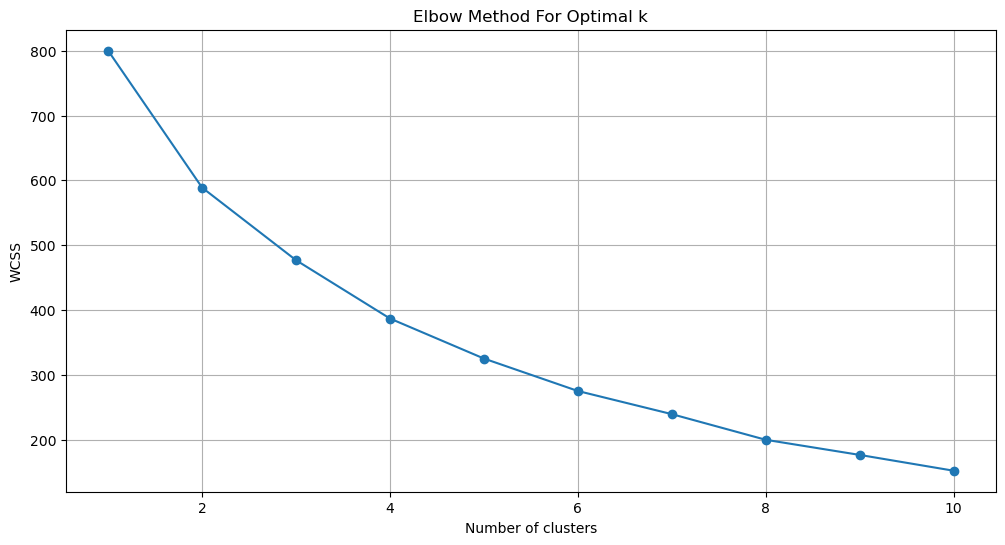

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(customer_data_scaled)
    wcss.append(kmeans.inertia_)
# Plotting the elbow graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
optimal_clusters = np.argmin(np.diff(np.diff(wcss)))+1


In [9]:
print(optimal_clusters)

6


C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak o

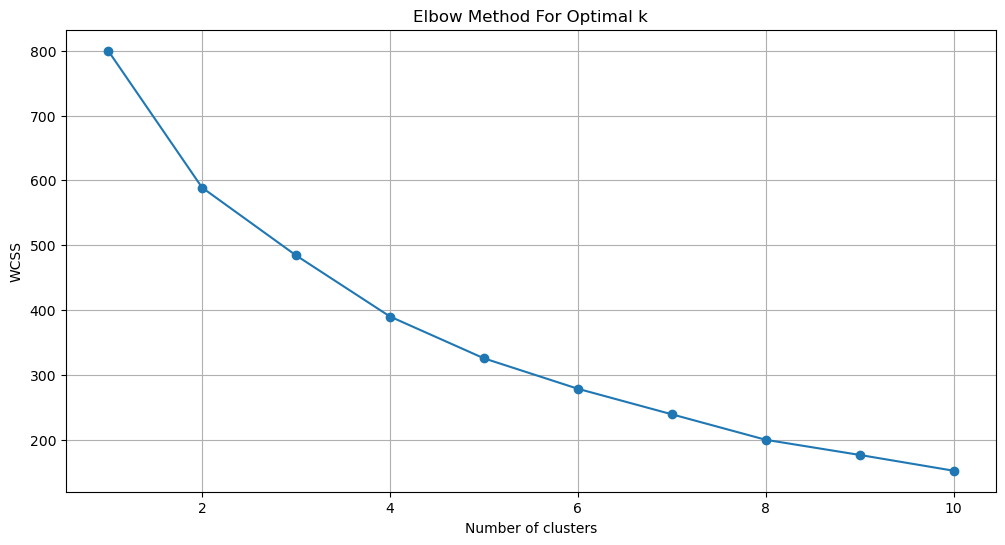

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(customer_data_scaled)
    wcss.append(kmeans.inertia_)
# Plotting the elbow graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
optimal_clusters = np.argmin(np.diff(np.diff(wcss)))+1

In [11]:
print(optimal_clusters)

8


# **Forming clusters using both initialization methods (Kmeans++ and random) and various distance metrics (Euclidean, Manhattan, and cosine similarity).

In [12]:
num_clusters = 6
num_init = 10
max_iter = 300
n_init_kmeanspp = 10

In [30]:
kmeans_euclidean1 = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=max_iter, n_init=n_init_kmeanspp, random_state=42)
kmeans_euclidean1.fit(customer_data_scaled)


C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, n_init=10, random_state=42)

In [14]:
kmeans_euclidean2 = KMeans(n_clusters=num_clusters, init='random', max_iter=max_iter, n_init=n_init_kmeanspp, random_state=42)
kmeans_euclidean2.fit(customer_data_scaled)

C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

For Manhattan distance, the data is scaled without centering (mean subtraction) or scaling (dividing by standard deviation). This means the scaler will not adjust the data by subtracting the mean or dividing by the standard deviation.

In [15]:
scm = StandardScaler(with_mean=False, with_std=False)
customer_data_scaled_manhattan = scm.fit_transform(data)

In [16]:
kmeans_manhattan1 = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=max_iter, n_init=n_init_kmeanspp, random_state=42)
kmeans_manhattan1.fit(customer_data_scaled_manhattan)

C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, n_init=10, random_state=42)

In [17]:
kmeans_manhattan2 = KMeans(n_clusters=num_clusters, init='random', max_iter=max_iter, n_init=n_init_kmeanspp, random_state=42)
kmeans_manhattan2.fit(customer_data_scaled_manhattan)

C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

Apply the MiniBatchKMeans model to the dataset using cosine distance. The MiniBatchKMeans algorithm will cluster the data into a specified number of clusters based on cosine distance.

In [18]:
from sklearn.cluster import MiniBatchKMeans

In [19]:
kmeans_cosine1 = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', batch_size=100, n_init=n_init_kmeanspp, random_state=42)
kmeans_cosine1.fit(data)

C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(batch_size=100, n_clusters=6, n_init=10, random_state=42)

In [20]:
kmeans_cosine2 = MiniBatchKMeans(n_clusters=num_clusters, init='random', batch_size=100, n_init=n_init_kmeanspp, random_state=42)
kmeans_cosine2.fit(data)

C:\Users\prajkta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(batch_size=100, init='random', n_clusters=6, n_init=10,
                random_state=42)

The silhouette score is a metric utilized for assessing the effectiveness of clustering outcomes. Ranging between -1 and 1, a higher score indicates greater similarity among data points within a cluster and less similarity with data points in other clusters.

In [21]:
sil_euclidean1 = silhouette_score(customer_data_scaled, kmeans_euclidean1.labels_)
sil_euclidean2 = silhouette_score(customer_data_scaled, kmeans_euclidean2.labels_)
sil_manhattan1 = silhouette_score(customer_data_scaled_manhattan, kmeans_manhattan1.labels_, metric='manhattan')
sil_manhattan2 = silhouette_score(customer_data_scaled_manhattan, kmeans_manhattan2.labels_, metric='manhattan')
sil_cosine1 = silhouette_score(data, kmeans_cosine1.labels_, metric='cosine')
sil_cosine2 = silhouette_score(data, kmeans_cosine2.labels_, metric='cosine')

## The Calinski-Harabasz index assesses clustering algorithms by examining the separation between clusters and the compactness within clusters. A higher index signifies well-separated and compact clusters, which is desirable. This index facilitates comparison of clustering algorithms and identification of the optimal number of clusters for a dataset. Its range is not fixed, varying depending on the dataset and number of clusters.**

In [22]:
cal_euclidean1 = calinski_harabasz_score(customer_data_scaled, kmeans_euclidean1.labels_)
cal_euclidean2 = calinski_harabasz_score(customer_data_scaled, kmeans_euclidean2.labels_)
cal_manhattan1 = calinski_harabasz_score(customer_data_scaled_manhattan, kmeans_manhattan1.labels_)
cal_manhattan2 = calinski_harabasz_score(customer_data_scaled_manhattan, kmeans_manhattan2.labels_)
cal_cosine1 = calinski_harabasz_score(data, kmeans_cosine1.labels_)
cal_cosine2 = calinski_harabasz_score(data, kmeans_cosine2.labels_)

In [23]:
print(f"Silhouette score for Euclidean distance with kmeans++: {sil_euclidean1}")
print(f"Silhouette score for Euclidean distance with random: {sil_euclidean2}")
print(f"Silhouette score for Manhattan distance with kmeans++: {sil_manhattan1}")
print(f"Silhouette score for Manhattan distance with random: {sil_manhattan2}")
print(f"Silhouette score for Cosine similarity with kmeans++: {sil_cosine1}")
print(f"Silhouette score for Cosine similarity with random: {sil_cosine2}")


Silhouette score for Euclidean distance with kmeans++: 0.33107393337175933
Silhouette score for Euclidean distance with random: 0.3285472275203275
Silhouette score for Manhattan distance with kmeans++: 0.4072462685381771
Silhouette score for Manhattan distance with random: 0.4072462685381771
Silhouette score for Cosine similarity with kmeans++: 0.28793929046383004
Silhouette score for Cosine similarity with random: 0.3088243975275228


### Based on the silhouette scores, the best clustering results are obtained using the Manhattan distance metric with both k-means++ and random initialization, with a score of 0.4072462685381771. The Euclidean distance and cosine similarity perform worse, with scores below 0.35.

In [24]:
print(f"Calinski-Harabasz index for Euclidean distance kmeans++: {cal_euclidean1}")
print(f"Calinski-Harabasz index for Euclidean distance with random: {cal_euclidean2}")
print(f"Calinski-Harabasz index for Manhattan distance kmeans++: {cal_manhattan1}")
print(f"Calinski-Harabasz index for Manhattan distance with random: {cal_manhattan2}")
print(f"Calinski-Harabasz index for Cosine similarity kmeans++: {cal_cosine1}")
print(f"Calinski-Harabasz index for Cosine similarity with random: {cal_cosine2}")

Calinski-Harabasz index for Euclidean distance kmeans++: 73.49623534335936
Calinski-Harabasz index for Euclidean distance with random: 73.43079014733595
Calinski-Harabasz index for Manhattan distance kmeans++: 269.83194405750726
Calinski-Harabasz index for Manhattan distance with random: 269.83194405750726
Calinski-Harabasz index for Cosine similarity kmeans++: 245.5911018004399
Calinski-Harabasz index for Cosine similarity with random: 233.07574279942187


### **The Calinski-Harabasz index further underscores the superiority of the Manhattan distance metric in clustering, exhibiting substantially higher values in comparison to Euclidean distance and cosine similarity. Notably, the choice of initialization method (k-means++ versus random) appears to have minimal impact on the Calinski-Harabasz index within a specific distance metric.**

### **To sum up, the Manhattan distance metric emerges as the most suitable choice for this dataset, yielding the highest silhouette scores and Calinski-Harabasz indices. The initialization method exhibits a lesser influence on the quality of clustering.**

### PLotting The Cluster distribution of all prepared cluster to show the distribution of each cluster

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)
pca_euclidean = pca.fit_transform(customer_data_scaled)
pca_manhattan = pca.fit_transform(customer_data_scaled_manhattan)
pca_cosine = pca.fit_transform(data)

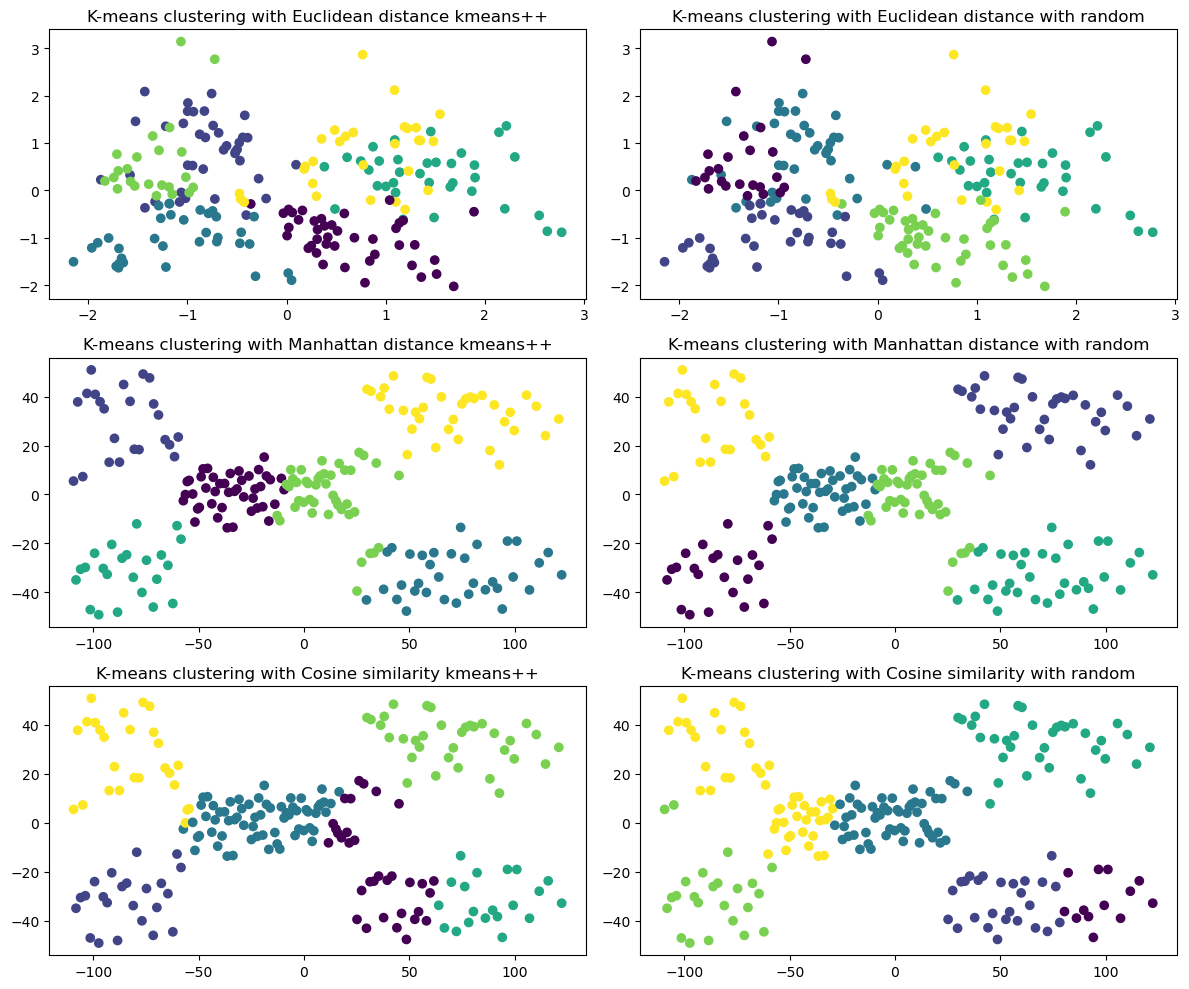

In [28]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.scatter(pca_euclidean[:, 0], pca_euclidean[:, 1], c=kmeans_euclidean1.labels_, cmap='viridis')
plt.title('K-means clustering with Euclidean distance kmeans++')
plt.subplot(3,2,2)
plt.scatter(pca_euclidean[:, 0], pca_euclidean[:, 1], c=kmeans_euclidean2.labels_, cmap='viridis')
plt.title('K-means clustering with Euclidean distance with random')

plt.subplot(3,2, 3)
plt.scatter(pca_manhattan[:, 0], pca_manhattan[:, 1], c=kmeans_manhattan1.labels_, cmap='viridis')
plt.title('K-means clustering with Manhattan distance kmeans++')
plt.subplot(3,2, 4)
plt.scatter(pca_manhattan[:, 0], pca_manhattan[:, 1], c=kmeans_manhattan2.labels_, cmap='viridis')
plt.title('K-means clustering with Manhattan distance with random')

plt.subplot( 3, 2,5)
plt.scatter(pca_cosine[:, 0], pca_cosine[:, 1], c=kmeans_cosine1.labels_, cmap='viridis')
plt.title('K-means clustering with Cosine similarity kmeans++')
plt.subplot( 3, 2,6)
plt.scatter(pca_cosine[:, 0], pca_cosine[:, 1], c=kmeans_cosine2.labels_, cmap='viridis')
plt.title('K-means clustering with Cosine similarity with random')

plt.tight_layout()
plt.show()

* **Euclidean Distance with Kmeans++ Initialization**: The plot in the top-left corner depicts the outcome of K-means clustering using Euclidean distance and kmeans++ initialization. It demonstrates well-defined clusters, indicating effective separation of data points into distinct groups.

* **Euclidean Distance with Random Initialization**: The plot in the top-right corner displays the result of K-means clustering using Euclidean distance and random initialization. Compared to kmeans++ initialization, the clusters are less distinct, suggesting that the initial placement of centroids can impact the final clusters.

* **Manhattan Distance with Kmeans++ Initialization**: The plot in the middle-left corner illustrates the outcome of K-means clustering using Manhattan distance and kmeans++ initialization. It exhibits three distinct clusters spread across a broader range on both axes compared to Euclidean distance.

* **Manhattan Distance with Random Initialization:** The plot in the middle-right corner showcases the result of K-means clustering using Manhattan distance and random initialization. Similar to its Euclidean counterpart, it shows less distinct separation between clusters when initialized randomly.

* **Cosine Similarity with Kmeans++ Initialization:** The plot in the bottom-left corner demonstrates the result of K-means clustering using Cosine similarity and kmeans++ initialization. This method yields clearly defined clusters, indicating the effectiveness of cosine similarity for certain data distributions.

* **Cosine Similarity with Random Initialization:** The plot in the bottom-right corner presents the outcome of K-means clustering using Cosine similarity and random initialization. While clusters are less defined due to random centroid placement, they are still visible.